In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

pd.set_option("display.width", 1000)
pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:.6f}".format

In [22]:
master_df_scaled = pd.read_pickle("../data/processed/master_df_scaled.pkl")
master_df = pd.read_pickle("../data/processed/master_df.pkl")

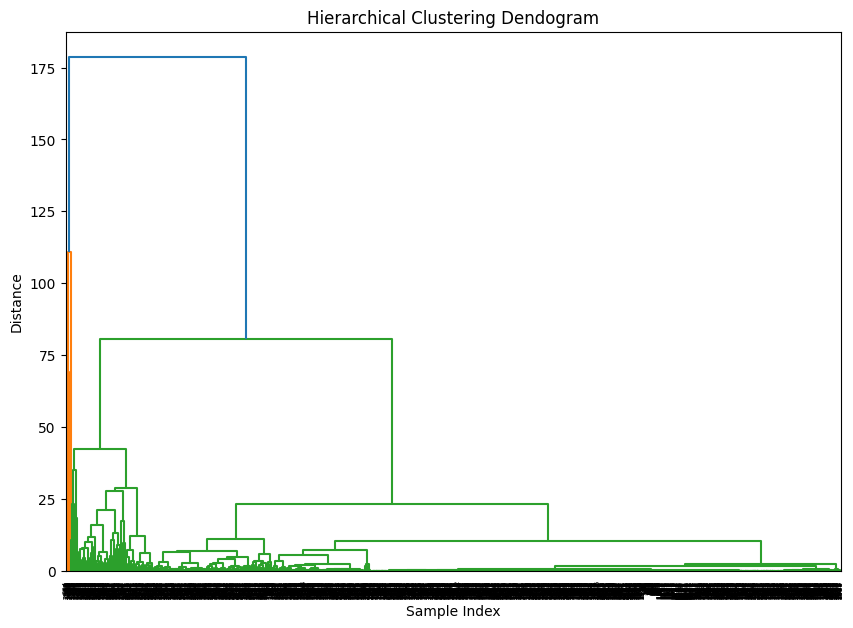

In [23]:
linked = linkage(master_df_scaled, method="ward")

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation="top", distance_sort="descending", show_leaf_counts=True)
plt.title("Hierarchical Clustering Dendogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

In [30]:
# Choose a threshold for the distance to cut the dendrogram
max_d = 75  # This is an example, you should adjust this value based on your dendrogram

# Form clusters based on the chosen threshold
clusters = fcluster(linked, max_d, criterion="distance")

# Add the cluster labels to the original dataframe
master_df_scaled["Cluster_ID"] = clusters
master_df["Cluster_ID"] = clusters

Silhouette Score: 0.7879557702987661


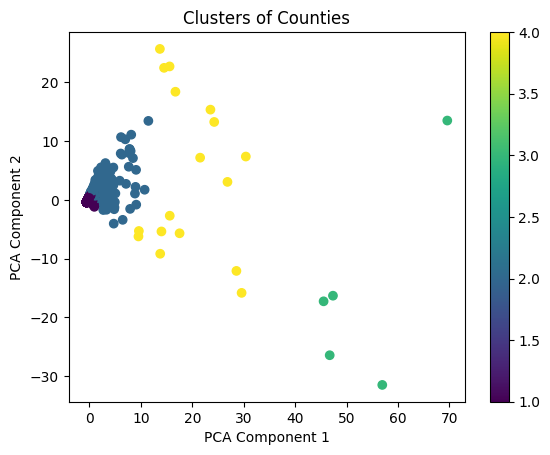

In [31]:
# Calculate the silhouette score
sil_score = silhouette_score(master_df_scaled, clusters)
print(f"Silhouette Score: {sil_score}")

# Visualization using PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(master_df_scaled)

plt.scatter(pca_features[:, 0], pca_features[:, 1], c=clusters, cmap="viridis")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Clusters of Counties")
plt.colorbar()
plt.show()

In [32]:
cluster_analysis = master_df.groupby("Cluster_ID").mean()
print(cluster_analysis)

            naics1_occ1  naics1_occ2  naics1_occ3  naics1_occ4  naics1_occ5  naics2-5_occ1-5  naics1_est  naics2-3_est  naics4-5_est      naics1_ap     naics2_ap   naics3-5_ap        mean_gdp
Cluster_ID                                                                                                                                                                                     
1              0.014223     0.024799     0.016776     0.029176     0.120350        29.944931    0.030635      0.809263      1.564187     130.168490    896.931437   3481.999635   129430.360904
2              1.381538     2.301538     2.018462     3.190769    15.990769       710.892308    1.864615     12.233846     18.627692   21958.344615  61013.972308  62007.163077  1662616.325897
3            124.800000   250.600000   168.600000   330.000000  1201.600000      1876.600000   60.800000     63.000000    126.200000 2906797.200000  97298.400000 303459.600000 18854049.966667
4             30.529412    56.647059    

In [33]:
pd.to_pickle(master_df_scaled, "../data/processed/master_df_cluster.pkl")